In [1]:
# 한글폰트(나눔) 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
! pip install geopandas

     |████████████████████████████████| 972kB 7.5MB/s 
     |████████████████████████████████| 6.5MB 17.0MB/s 
     |████████████████████████████████| 14.8MB 333kB/s 


In [3]:
! pip install haversine

In [4]:
import pandas as pd
import folium
from folium import plugins
from shapely.geometry import Point
from haversine import haversine, Unit
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pathlib
import os

from sklearn.preprocessing import MinMaxScaler

from shapely.geometry import Point

import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family='NanumBarunGothic')

In [5]:
path = "/content/drive/MyDrive/compas/data/"
save_path = "/content/drive/MyDrive/compas/"

In [6]:
# load data
주정차단속 = pd.read_csv(path+'1.오산시_주정차단속(2018~2020).csv',encoding="utf-8")
어린이교통사고_격자 = gpd.read_file(path+'2.오산시_어린이교통사고_격자 - 복사본.geojson', encoding="utf-8")
차량등록현황_격자 = gpd.read_file(path+'3.오산시_차량등록현황_격자.geojson', encoding="utf-8")
거주인구격자_총인구 = gpd.read_file(path+'4.오산시_연령별_거주인구격자(총인구).geojson', encoding="utf-8")
거주인구격자_유소년 = gpd.read_file(path+'5.오산시_연령별_거주인구격자(유소년).geojson', encoding="utf-8")
거주인구격자_생산가능 = gpd.read_file(path+'6.오산시_연령별_거주인구격자(생산가능인구).geojson', encoding="utf-8")
거주인구격자_고령 = gpd.read_file(path+'7.오산시_연령별_거주인구격자(고령).geojson', encoding="utf-8")
유동인구 = pd.read_csv(path+'8.오산시_유동인구(2019) - 복사본.csv',encoding="utf-8")
어린이보호구역 = pd.read_csv(path+'9.오산시_어린이보호구역.csv',encoding="utf-8")
학교위치정보 = pd.read_csv(path+'10.오산시_학교위치정보.csv',encoding="utf-8")
초등학교_통학구 = gpd.read_file(path+'11.오산시_초등학교_통학구.geojson', encoding="utf-8")
중학교_학군 = gpd.read_file(path+'12.오산시_중학교_학군.geojson', encoding="utf-8")
어린이집_유치원현황 = pd.read_csv(path+'13.오산시_어린이집_유치원현황.csv',encoding="utf-8")
기상데이터 = pd.read_csv(path+'14.오산시_기상데이터(2010~2019).csv',encoding="utf-8")
무인교통단속카메라 = pd.read_csv(path+'15.오산시_무인교통단속카메라.csv',encoding="utf-8")
도로안전표지 = pd.read_csv(path+'16.오산시_도로안전표지표준데이터.csv',encoding="utf-8")
횡단보도 = gpd.read_file(path+'17.오산시_횡단보도.geojson', encoding="utf-8")
과속방지턱 = pd.read_csv(path+'18.오산시_과속방지턱표준데이터.csv',encoding="utf-8")
신호등 = gpd.read_file(path+'19.오산시_신호등.geojson', encoding="utf-8")
CCTV설치현황 = pd.read_csv(path+'20.오산시_CCTV설치현황.csv',encoding="utf-8")
인도 = gpd.read_file(path+'21.오산시_인도.geojson', encoding="utf-8")
버스정류장 = pd.read_csv(path+'22.오산시_버스정류장.csv',encoding="utf-8")
상세도로망 = gpd.read_file(path+'23.오산시_상세도로망_LV6.geojson', encoding="utf-8")
시간대별_추정교통량 = pd.read_csv(path+'24.평일_전일,시간대별_오산시_추정교통량_Level6.csv',encoding="utf-8")
혼잡빈도강도 = pd.read_csv(path+'25.평일_전일_오산시_혼잡빈도강도_Level6.csv',encoding="utf-8")
혼잡시간강도 = pd.read_csv(path+'26.평일_전일_오산시_혼잡시간강도_Level6.csv',encoding="utf-8")
도로명주소_건물 = gpd.read_file(path+'27.오산시_도로명주소_건물.geojson', encoding="utf-8")
건물연면적_격자 = gpd.read_file(path+'28.오산시_건물연면적_격자.geojson', encoding="utf-8")
체육시설현황 = pd.read_csv(path+'29.오산시_체육시설현황.csv',encoding="utf-8")
학원_및_교습소_현황 = pd.read_csv(path+'30.오산시_학원 및 교습소 현황.csv',encoding="utf-8")
법정경계_시군구 = gpd.read_file(path+'31.오산시_법정경계(시군구).geojson', encoding="utf-8")
행정경계_읍면동 = gpd.read_file(path+'32.오산시_행정경계(읍면동).geojson', encoding="utf-8")
법정경계_읍면동 = gpd.read_file(path+'33.오산시_법정경계(읍면동).geojson', encoding="utf-8")
지적도 = gpd.read_file(path+'34.오산시_지적도.geojson', encoding="utf-8")
코드정의서 =  pd.read_excel(path+'35.코드정의서.xlsx')

In [12]:
data=pd.read_csv(path+'어린이보호구역_fin.csv', encoding='utf-8').drop('Unnamed: 0', axis=1)

In [9]:
# 지도 고정값
center =[37.1515948, 127.0359805]
zoom =13

# 1. 어린이보호구역별 시설물 + 교통사고 통합 데이터 만들기

In [13]:
data.head(3)

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,주택횟수,어린이교통사고횟수,과속방지턱수,과속cctv수,최대속도30,최대속도50,최대속도60,최대속도70,최대속도80
0,특수학교,성심학교,N,0,25,127.017521,37.176762,3,0,0,0,0,0,1,0,0
1,초등학교,가수초등학교,Y,1,12,127.047957,37.148103,22,2,0,0,0,0,0,0,0
2,초등학교,광성초등학교,Y,2,12,127.039709,37.184197,69,8,0,0,6,0,15,0,13


## 1-1. 어린이보호구역 + 무인교통단속카메라
- 어린이보호구역 100m내에 설치된 무인교통단속카메라(**불법주정차단속카메라**) 카운트
  - 주정차단속CCTV 단속 범위: 전후좌우 100m

In [16]:
무인교통단속카메라.head(3)

,도로노선명,도로노선방향,설치장소명,단속구분,설치위치_경도,설치위치_위도
0,궐리사로,양방향,궐동-법원앞(법원사거리),불법주정차,127.059357,37.159313
1,역광장로,양방향,원동-오산역광장,불법주정차,127.067796,37.145409
2,궐리사로,양방향,궐동-제일하이빌,불법주정차,127.062386,37.159198


In [17]:
무인교통단속카메라['단속구분'].value_counts()

불법주정차    112
Name: 단속구분, dtype: int64

In [18]:
# 어린이보호구역 100m내에 설치된 무인교통단속카메라(=주정차CCTV) 카운트
def check_parkingcamera(row):
  global 무인교통단속카메라
  lat = row['보호구역_위도']
  lng = row['보호구역_경도']
  cnt = 0
  for row2 in 무인교통단속카메라.iloc:
    if haversine((lat, lng), (row2['설치위치_위도'], row2['설치위치_경도']), unit="m") <= 100:
        cnt+=1
  return cnt

data['주정차단속CCTV대수']=data.apply(check_parkingcamera, axis=1)

## 1-2. 어린이보호구역 + 유동인구
- 등하교시간대 어린이보호구역 300m내 평균 유동인구

In [19]:
# 유동인구 데이터 포멧 변경: lat, lon
temp=유동인구.groupby(['lat', 'lon']).mean().drop('STD_YM', axis=1).reset_index()

# 등하교 시간대만 따로 빼서 평균유동인구 계산: 08~10시, 12~18시
temp=temp[['lat','lon','TMST_08','TMST_09', 'TMST_10', 'TMST_12', 'TMST_13', 'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18']]
temp=pd.melt(temp, id_vars=['lat','lon'])
평균유동인구=temp.groupby(['lat','lon']).mean().reset_index()
평균유동인구.head(3)

,lat,lon,value
0,37.125623,127.071472,3.832583
1,37.125629,127.073161,0.931417
2,37.125631,127.073724,0.941750


In [20]:
# 어린이보호구역 300m내에서 등하교시간대 평균 유동인구 합산
def check_movingppl(row):
  global 평균유동인구
  lat = row['보호구역_위도']
  lng = row['보호구역_경도']
  cnt = 0
  for row2 in 평균유동인구.iloc:
    if haversine((lat, lng), (row2['lat'], row2['lon']), unit="m") <= 300:
        cnt += row2['value']
  return cnt

data['평균유동인구']=data.apply(check_movingppl, axis=1)

## 1-3. 어린이보호구역 + 불법주정차단속
- 어린이보호구역 100m내 불법주정차단속 횟수 카운트

In [22]:
주정차단속.head(3)

,단속일자,단속위치,행정구역,스쿨존여부,단속위치_경도,단속위치_위도,단속종류
0,20181101,금암동 여계산로 부근,경기도 오산시 세교동,N,127.043462,37.170237,이동형CCTV단속
1,20181101,세교동 세마역로19번길,경기도 오산시 세교동,N,127.044770,37.181695,이동형CCTV단속
2,20181101,세교동 수목원로 부근,경기도 오산시 양산동,N,127.042200,37.186357,이동형CCTV단속


In [29]:
주정차단속['스쿨존여부'].value_counts()

N    61624
Y       77
Name: 스쿨존여부, dtype: int64

In [36]:
주정차단속[주정차단속['스쿨존여부']=='Y']['단속위치'].value_counts()

가수동 가수로 부근        59
원동 오산로132번길 부근     3
궐동 궐리사로46번길 부      3
수청동 수청로 부근         2
원동 운천로 부근          2
원동 경기대로 부근         1
수청동 청학로173번길 부     1
원동 오산로 부근          1
갈곶동 오산로 부근         1
원동 대원동동사문소부근       1
청호동 청호로 부근         1
오산동 성호대로 부근        1
내삼미동 수청로 부근        1
Name: 단속위치, dtype: int64

In [28]:
주정차단속_스쿨존['단속종류'].value_counts()

이동형CCTV단속    77
Name: 단속종류, dtype: int64

In [61]:
# 동별 경계, 기존 어린이보호구역 포함된 지도 우선 생성
m = folium.Map(location=center, zoom_start=zoom)

folium.GeoJson(
    법정경계_읍면동,
    name = "동 경계",
    style_function=lambda feature: {
        'color': '#000000',
        'weight': 2,
        'opacity':0.2,
    }
).add_to(m)

for line in 주정차단속[주정차단속['스쿨존여부']=='Y'].iloc:
  lat = line['단속위치_위도']
  lng = line['단속위치_경도']
  folium.Marker(
      location=[lat, lng],
      # radius=30,
      # stroke=False,
      # fill=True,
      # fill_color='red',
      # fill_opacity=0.6,
  ).add_to(m)

for line in 어린이보호구역.iloc:
    [lng,lat] = line[-2:]
    folium.Circle(
    location = [lat,lng],
    radius=300,
    stroke=False,
    fill=True,
    fill_color='green',
    fill_opacity=0.6).add_to(m)

In [289]:
m

In [63]:
# 어린이보호구역 300m내에서 이동형CCTV단속 횟수 카운트
def check_movingcctv(row):
  global 주정차단속_스쿨존
  lat = row['보호구역_위도']
  lng = row['보호구역_경도']
  cnt = 0
  for row2 in 주정차단속_스쿨존.iloc:
    if row2['스쿨존여부']=='Y':
      if haversine((lat, lng), (row2['단속위치_위도'], row2['단속위치_경도']), unit="m") <= 300:
        cnt += 1
  return cnt

data['이동형CCTV단속횟수']=data.apply(check_movingcctv, axis=1)

In [64]:
data.head(3)

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,주택횟수,어린이교통사고횟수,과속방지턱수,과속cctv수,최대속도30,최대속도50,최대속도60,최대속도70,최대속도80,주정차단속CCTV대수,평균유동인구,이동형CCTV단속횟수
0,특수학교,성심학교,N,0,25,127.017521,37.176762,3,0,0,0,0,0,1,0,0,0,39.944379,0
1,초등학교,가수초등학교,Y,1,12,127.047957,37.148103,22,2,0,0,0,0,0,0,0,0,93.085020,57
2,초등학교,광성초등학교,Y,2,12,127.039709,37.184197,69,8,0,0,6,0,15,0,13,1,904.784352,0


In [65]:
data['이동형CCTV단속횟수'].sum()
# 어린이보호구역을 반경 300m로 정의했을때, 어린이보호구역과 스쿨존 안에서 발생한 불법주정차 단속 건수가 여러 어린이보호구역과 겹치는 경우가 있었음.
# 이런 경우를 감안했을때, data['이동형CCTV단속횟수'] 컬럼의 합산값은 77개보다 많이 나오게 됨.

176

In [ ]:
############################################################

In [66]:
data.to_csv(save_path+'과제2_ver2.csv', encoding='utf-8')

In [ ]:
################################################################

# 2. 교통안전시설물 설치 후보지 선정

## 2-1. 컬럼 선정

In [74]:
col_list=['시설명', '시설종류', '보호구역_경도', '보호구역_위도', 'CCTV설치여부', 'CCTV설치대수', 
      '보호구역도로폭', '어린이교통사고횟수', '과속방지턱수', 
      '과속cctv수', '주정차단속CCTV대수', '이동형CCTV단속횟수', '평균유동인구']

data2=data[col_list]

data2.head(3)

,시설명,시설종류,보호구역_경도,보호구역_위도,CCTV설치여부,CCTV설치대수,보호구역도로폭,어린이교통사고횟수,과속방지턱수,과속cctv수,주정차단속CCTV대수,이동형CCTV단속횟수,평균유동인구
0,성심학교,특수학교,127.017521,37.176762,N,0,25,0,0,0,0,0,39.944379
1,가수초등학교,초등학교,127.047957,37.148103,Y,1,12,2,0,0,0,57,93.085020
2,광성초등학교,초등학교,127.039709,37.184197,Y,2,12,8,0,0,1,0,904.784352


In [75]:
data2.describe()

,보호구역_경도,보호구역_위도,CCTV설치대수,보호구역도로폭,어린이교통사고횟수,과속방지턱수,과속cctv수,주정차단속CCTV대수,이동형CCTV단속횟수,평균유동인구
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,127.062625,37.156908,1.153846,8.494505,8.395604,0.472527,0.252747,0.263736,1.934066,618.568406
std,0.015165,0.017997,0.801708,4.796697,6.987098,0.873571,0.461722,0.490695,8.266132,420.618170
min,127.017521,37.127317,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.610148
25%,127.053149,37.141538,1.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,295.740673
50%,127.064386,37.155951,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,563.877972
75%,127.072358,37.167227,1.500000,12.000000,14.000000,1.000000,0.000000,0.000000,1.000000,848.287152
max,127.090958,37.197877,3.000000,25.000000,27.000000,3.000000,2.000000,2.000000,57.000000,1800.153568


## 2-2. 데이터 전처리 & 스코어 데이터프레임 생성

In [184]:
# 스코어 데이터프레임 생성
score=pd.DataFrame()
score['시설명']=data2['시설명']
score['보호구역_경도']=data2['보호구역_경도']
score['보호구역_위도']=data2['보호구역_위도']

### **시설종류**
* 어린이집 -> 1
* 초등학교 -> 0.5
* 유치원 -> 0.25
* 특수학교 -> 0

In [185]:
data2['시설종류'].value_counts()

어린이집    48
초등학교    25
유치원     17
특수학교     1
Name: 시설종류, dtype: int64

In [186]:
data2.groupby('시설종류').sum()['어린이교통사고횟수']

시설종류
어린이집    394
유치원     132
초등학교    238
특수학교      0
Name: 어린이교통사고횟수, dtype: int64

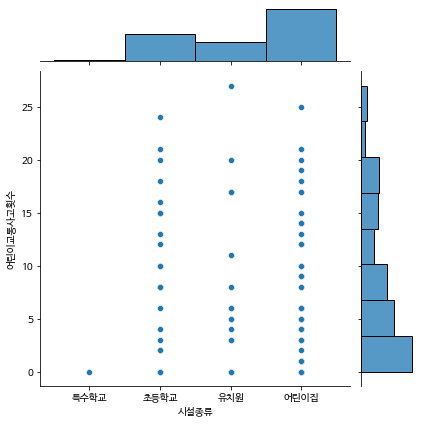

In [187]:
sns.jointplot(data2['시설종류'], data2['어린이교통사고횟수'])

In [188]:
score['시설종류']=data2['시설종류'].map({'어린이집':1, '초등학교': 0.5, '유치원': 0.25,'특수학교': 0})
score['시설종류'].corr(data2['어린이교통사고횟수'])

0.011834645102679578

### **CCTV설치여부**
* CCTV 설치 -> 0.7
* CCTV 미설치 -> 1

In [189]:
data2['CCTV설치여부'].value_counts()

Y    74
N    17
Name: CCTV설치여부, dtype: int64

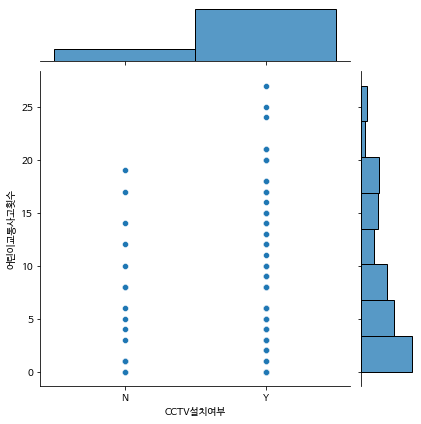

In [190]:
sns.jointplot(data2['CCTV설치여부'], data2['어린이교통사고횟수'])

In [229]:
score['CCTV설치여부']=data2['CCTV설치여부'].map({'Y':0.7, 'N':1})
score['CCTV설치여부'].corr(data2['어린이교통사고횟수'])

-0.13278395442948165

### **CCTV설치대수**
* 0대 -> 1점
* 1대 -> 0.7점
* 2대 -> 0.5점
* 3대 -> 0.3점

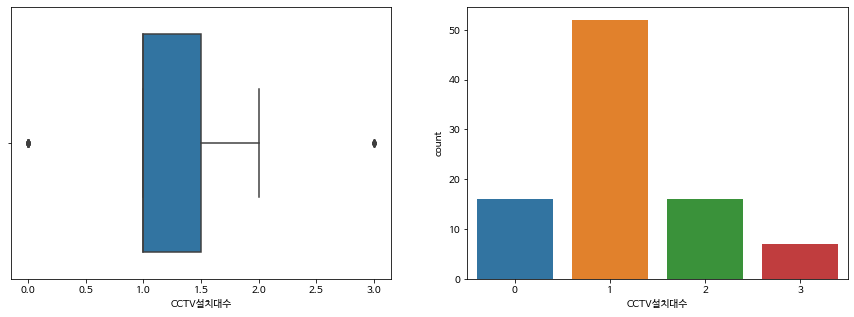

In [192]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['CCTV설치대수'], ax=axes[0])

sns.countplot(data2['CCTV설치대수'], ax=axes[1])

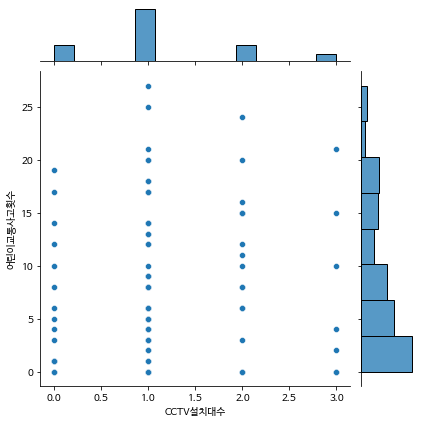

In [193]:
sns.jointplot(data2['CCTV설치대수'], data2['어린이교통사고횟수'])

In [230]:
data2['CCTV설치대수'].corr(data2['어린이교통사고횟수'])

0.10604400698226488

In [194]:
data2['CCTV설치대수'].describe()

count    91.000000
mean      1.153846
std       0.801708
min       0.000000
25%       1.000000
50%       1.000000
75%       1.500000
max       3.000000
Name: CCTV설치대수, dtype: float64

In [231]:
score['CCTV설치대수']=data2['CCTV설치대수'].map({0: 1, 1: 0.7, 2: 0.5, 3: 0.3})

### **보호구역도로폭**
* 6미만 -> 0
* 6이상 12이하 -> 1
* 12초과 15미만 -> 0.7
* 15이상 -> 0.5

In [232]:
data2['보호구역도로폭'].describe()

count    91.000000
mean      8.494505
std       4.796697
min       3.000000
25%       6.000000
50%       6.000000
75%      12.000000
max      25.000000
Name: 보호구역도로폭, dtype: float64

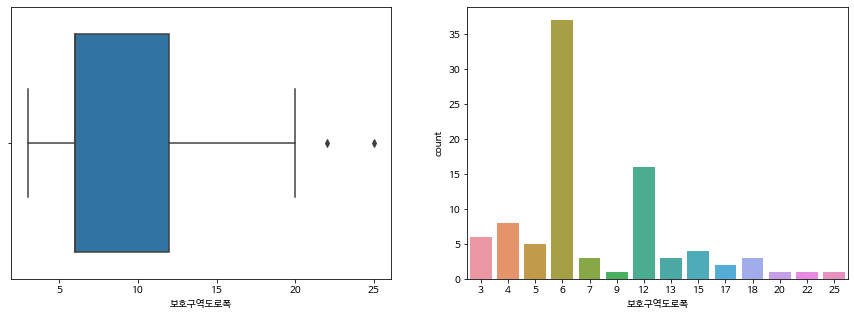

In [233]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['보호구역도로폭'], ax=axes[0])

sns.countplot(data2['보호구역도로폭'], ax=axes[1])

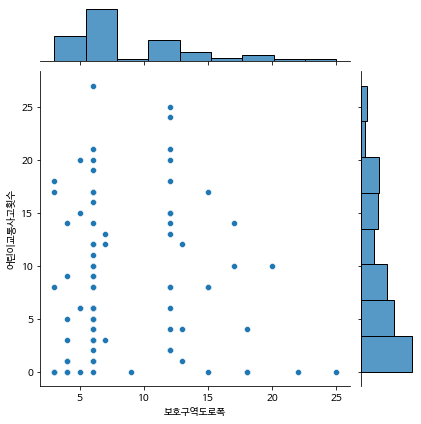

In [234]:
sns.jointplot(data2['보호구역도로폭'], data2['어린이교통사고횟수'])

In [235]:
def myfunc1(val):
  if val <= 12 & val >= 6:
    return 0
  elif val < 6:
    return 1
  elif val < 15:
    return 0.7
  else:
    return 0.5

score['보호구역도로폭']=data2['보호구역도로폭'].apply(myfunc1)

### **과속방지턱 수**
* 0개 -> 1
* 1개이상 -> 0.5
* **=> 가중치 2 곱함**

In [236]:
data2['과속방지턱수'].describe()

count    91.000000
mean      0.472527
std       0.873571
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000
Name: 과속방지턱수, dtype: float64

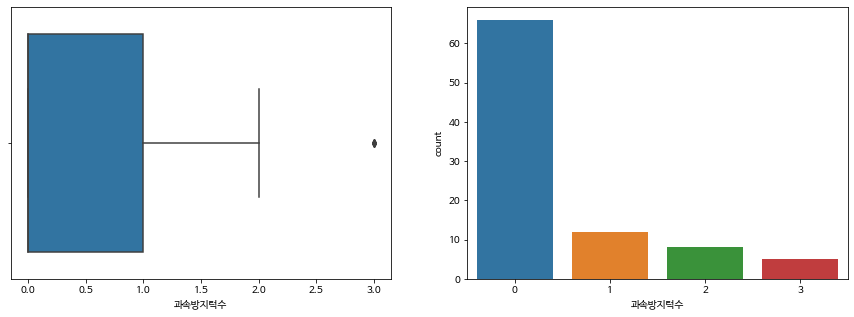

In [237]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['과속방지턱수'], ax=axes[0])

sns.countplot(data2['과속방지턱수'], ax=axes[1])

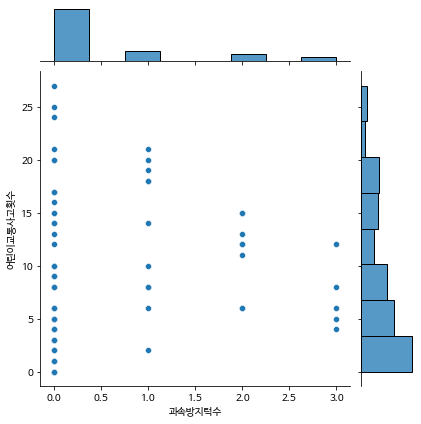

In [238]:
sns.jointplot(data2['과속방지턱수'], data2['어린이교통사고횟수'])

In [239]:
data2['과속방지턱수'].corr(data2['어린이교통사고횟수'])

0.13832905215174826

In [240]:
def myfunc2(val):
  if val == 0:
    return 1
  else:
    return 0.5

score['과속방지턱수']=(data2['과속방지턱수'].apply(myfunc2))*2

### **과속CCTV수**
* 0개 -> 0.5
* 1개 이상 -> 1
* **=> 가중치 7 곱함**

In [241]:
data2['과속cctv수'].describe()

count    91.000000
mean      0.252747
std       0.461722
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: 과속cctv수, dtype: float64

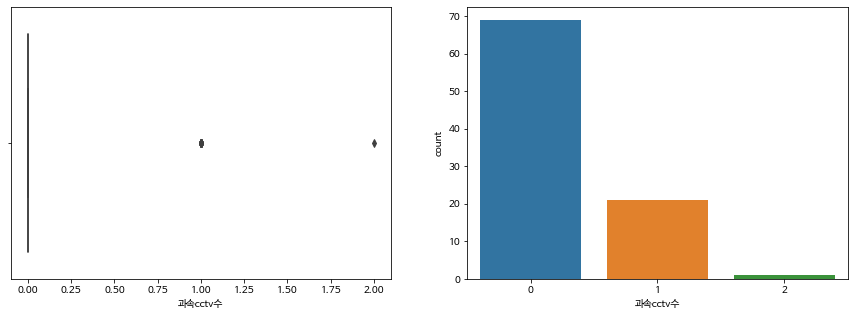

In [242]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['과속cctv수'], ax=axes[0])

sns.countplot(data2['과속cctv수'], ax=axes[1])

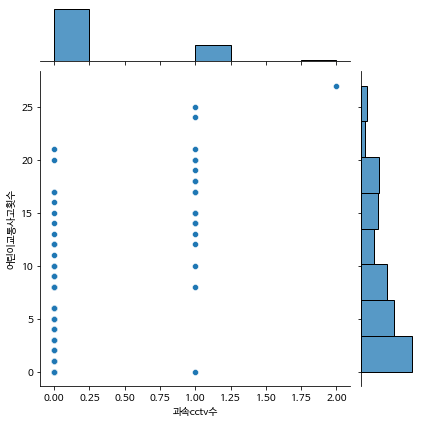

In [243]:
sns.jointplot(data2['과속cctv수'], data2['어린이교통사고횟수'])

In [244]:
data2['과속cctv수'].corr(data2['어린이교통사고횟수'])

0.6540455209301205

In [245]:
def myfunc3(val):
  if val == 0:
    return 0.5
  else:
    return 1

score['과속CCTV수']=(data2['과속cctv수'].apply(myfunc3))*7

### **주정차단속CCTV대수**
* 0대 -> 0
* 1대이상 -> 0.3

In [246]:
data2['주정차단속CCTV대수'].describe()

count    91.000000
mean      0.263736
std       0.490695
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: 주정차단속CCTV대수, dtype: float64

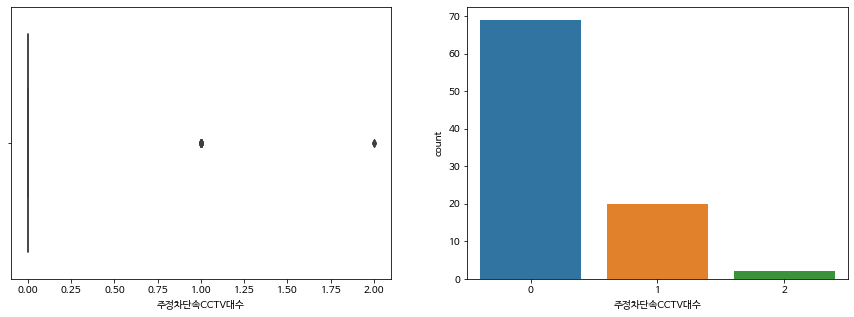

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['주정차단속CCTV대수'], ax=axes[0])

sns.countplot(data2['주정차단속CCTV대수'], ax=axes[1])

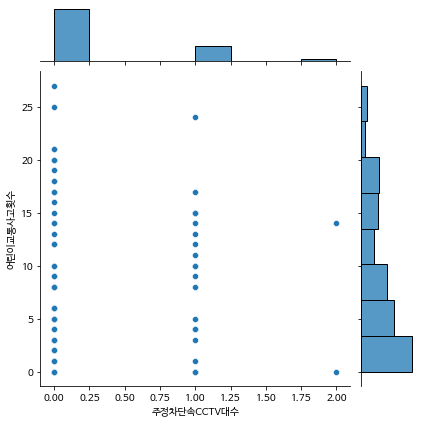

In [248]:
sns.jointplot(data2['주정차단속CCTV대수'], data2['어린이교통사고횟수'])

In [249]:
data2['주정차단속CCTV대수'].corr(data2['어린이교통사고횟수'])

0.053490628738477375

In [250]:
score['주정차단속CCTV대수']=data2['주정차단속CCTV대수'].apply(lambda x: 0 if x == 0 else 0.3)

### **이동형CCTV단속횟수**
* 0번 -> 1
* 1번이상 -> 0.3

In [251]:
data2['이동형CCTV단속횟수'].describe()

count    91.000000
mean      1.934066
std       8.266132
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max      57.000000
Name: 이동형CCTV단속횟수, dtype: float64

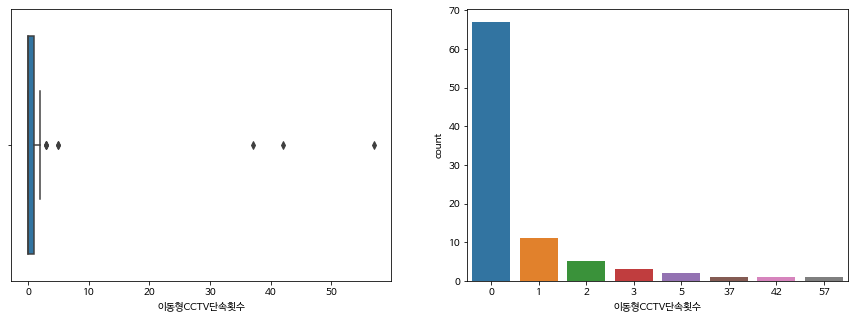

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['이동형CCTV단속횟수'], ax=axes[0])

sns.countplot(data2['이동형CCTV단속횟수'], ax=axes[1])

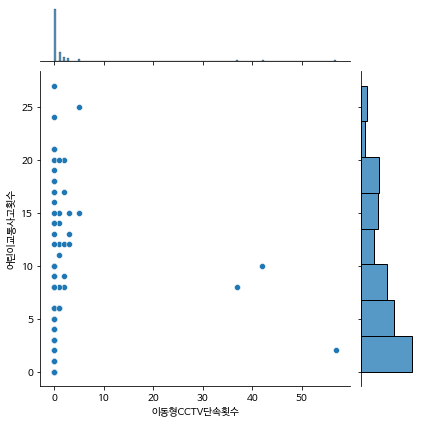

In [253]:
sns.jointplot(data2['이동형CCTV단속횟수'], data2['어린이교통사고횟수'])

In [254]:
data2['이동형CCTV단속횟수'].corr(data2['어린이교통사고횟수'])

-0.016472741519930695

In [255]:
score['이동형CCTV단속횟수']=data2['이동형CCTV단속횟수'].apply(lambda x: 0 if x == 1 else 0.3)

### **평균유동인구**
* 0 -> 0
* 25%미만 -> 0.25
* 25~75% -> 0.7
* 75%이상 -> 1
* **=> 가중치 8 곱함**

In [256]:
data2['평균유동인구'].describe()

count      91.000000
mean      618.568406
std       420.618170
min        27.610148
25%       295.740673
50%       563.877972
75%       848.287152
max      1800.153568
Name: 평균유동인구, dtype: float64

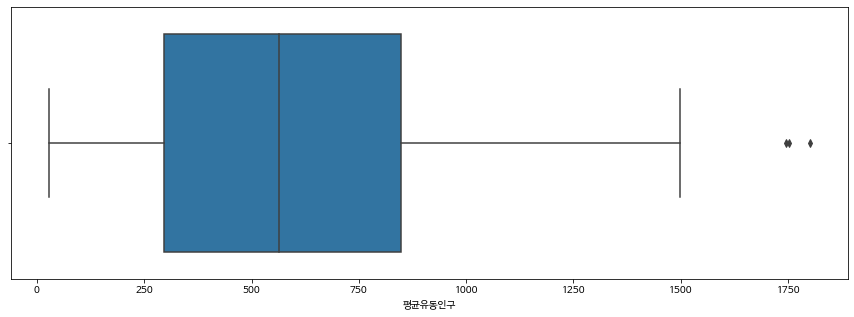

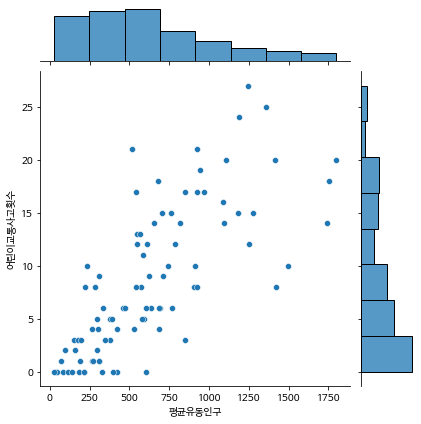

In [257]:
fig, axes = plt.subplots(1, figsize=(15,5))

sns.boxplot(data2['평균유동인구'], ax=axes)

sns.jointplot(data2['평균유동인구'], data2['어린이교통사고횟수'])

In [258]:
data2['평균유동인구'].corr(data2['어린이교통사고횟수'])

0.7480002153486073

In [259]:
def myfunc4(val):
  if val == 0:
    return 0
  elif val < np.percentile(data2['평균유동인구'], 25):
    return 0.25
  elif val < np.percentile(data2['평균유동인구'], 75):
    return 0.7
  else:
    return 1

score['평균유동인구']=(data2['평균유동인구'].apply(myfunc4))*8

### **최종 스코어 데이터프레임**

In [260]:
score.head()

,시설명,보호구역_경도,보호구역_위도,시설종류,CCTV설치여부,CCTV설치대수,보호구역도로폭,과속방지턱수,과속CCTV수,주정차단속CCTV대수,이동형CCTV단속횟수,평균유동인구
0,성심학교,127.017521,37.176762,0.0,1.0,1.0,0.5,2.0,3.5,0.0,0.3,2.0
1,가수초등학교,127.047957,37.148103,0.5,0.7,0.7,0.0,2.0,3.5,0.0,0.3,2.0
2,광성초등학교,127.039709,37.184197,0.5,0.7,0.5,0.0,2.0,3.5,0.3,0.3,8.0
3,대호초등학교,127.057889,37.159106,0.5,0.7,0.3,0.0,1.0,7.0,0.0,0.3,5.6
4,매홀초등학교,127.063282,37.162749,0.5,0.7,0.5,0.7,1.0,3.5,0.0,0.0,5.6


## 2-3. 스코어 데이터프레임
1. 합계 컬럼 만들기
2. 줄세우기

In [300]:
score['합계']=0

In [301]:
score['합계']=score.drop(['보호구역_경도', '보호구역_위도'], axis=1).sum(axis=1)

In [302]:
candidates=score.sort_values(by='합계', ascending=False)[:20]['시설명'].reset_index(drop=True)
candidates

0      시립가온어린이집
1      아이마루어린이집
2        그린어린이집
3      시립남부어린이집
4         대일유치원
5       동화마을유치원
6         예인유치원
7      시립오산어린이집
8      오산원일초등학교
9        운산초등학교
10       성산초등학교
11     오산대원초등학교
12       운천초등학교
13       성호초등학교
14     아이사랑어린이집
15    시립비둘기어린이집
16      둥근해어린이집
17      하얀뜰어린이집
18      늘해랑어린이집
19     키즈청호어린이집
Name: 시설명, dtype: object

In [303]:
score.iloc[candidates.index]

,시설명,보호구역_경도,보호구역_위도,시설종류,CCTV설치여부,CCTV설치대수,보호구역도로폭,과속방지턱수,과속CCTV수,주정차단속CCTV대수,이동형CCTV단속횟수,평균유동인구,합계
0,성심학교,127.017521,37.176762,0.0,1.0,1.0,0.5,2.0,3.5,0.0,0.3,2.0,10.3
1,가수초등학교,127.047957,37.148103,0.5,0.7,0.7,0.0,2.0,3.5,0.0,0.3,2.0,9.7
2,광성초등학교,127.039709,37.184197,0.5,0.7,0.5,0.0,2.0,3.5,0.3,0.3,8.0,15.8
3,대호초등학교,127.057889,37.159106,0.5,0.7,0.3,0.0,1.0,7.0,0.0,0.3,5.6,15.4
4,매홀초등학교,127.063282,37.162749,0.5,0.7,0.5,0.7,1.0,3.5,0.0,0.0,5.6,12.5
5,삼미초등학교,127.060269,37.191356,0.5,0.7,0.5,0.7,2.0,3.5,0.0,0.3,5.6,13.8
6,성산초등학교,127.067040,37.150444,0.5,0.7,0.3,0.0,2.0,7.0,0.0,0.3,8.0,18.8
7,성호초등학교,127.070953,37.150478,0.5,0.7,0.5,0.0,1.0,7.0,0.3,0.0,8.0,18.0
8,수청초등학교,127.055474,37.170857,0.5,0.7,0.3,0.5,2.0,3.5,0.0,0.3,5.6,13.4
9,오산초등학교,127.050165,37.145158,0.5,0.7,0.3,0.7,2.0,3.5,0.0,0.3,2.0,10.0


In [287]:
# 지도에 시각화
# 동별 경계, 기존 어린이보호구역 포함된 지도 우선 생성
m2 = folium.Map(location=center, zoom_start=zoom)

folium.GeoJson(
    법정경계_읍면동,
    name = "동 경계",
    style_function=lambda feature: {
        'color': '#000000',
        'weight': 2,
        'opacity':0.2,
    }
).add_to(m2)

for line in 어린이보호구역.iloc:
  if line['시설명'] in list(candidates):
      [lng,lat] = line[-2:]
      folium.Circle(
      location = [lat,lng],
      radius=300,
      stroke=False,
      fill=True,
      fill_color='purple',
      fill_opacity=0.6,
      tooltip=line['시설명']
).add_to(m2)

In [304]:
m2